In [2]:
import os
import pandas as pd
# import IPython.display as ipd
# import librosa
# import librosa.display
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter
import copy
import glob
import json

In [3]:
notes = ['C','Db','D','Eb','E','F','Gb','G','Ab','A','Bb','B']

semitons = list(range(0,12))
semitons.extend(list(range(0,12)))
semitons

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [4]:
data = pd.read_csv('../corpus/generated_chords/chromas.csv')
data.set_index('Unnamed: 0', inplace=True)
data.head()

,C,Db,D,Eb,E,F,Gb,G,Ab,A,Bb,B,true
Unnamed: 0,,,,,,,,,,,,,
Adim_Nawakhat_Flute.ogg,20760.708984,3785.799561,1918.265991,15572.839844,8731.242188,3501.267822,16137.893555,9174.405273,5401.053223,36969.769531,10654.647461,3569.312256,Adim
Ddim_york-samai_Flute.ogg,4375.995605,2476.719482,19825.443359,6544.238281,2427.818115,16179.813477,5883.677246,2274.637939,13487.067383,4407.742676,3799.718750,18750.318359,Ddim
Ddim_agsag-samai_Flute.ogg,4757.529785,4617.486816,40611.800781,10245.474609,2260.584961,15512.979492,9978.814453,2673.318848,13023.239258,6278.671387,3372.433838,14634.633789,Ddim
Adim_agogo-samba_Flute.ogg,49702.062500,10099.418945,7229.648438,59813.046875,42205.683594,19202.558594,87830.429688,29791.218750,20701.199219,146976.843750,40828.687500,9821.972656,Adim
Cdim_agogo-samba_Flute.ogg,74844.898438,21082.603516,5456.087891,34039.152344,21792.017578,7089.446777,34986.039062,21720.095703,11436.190430,45434.156250,13306.848633,8570.800781,Cdim


In [5]:
def fix_meio_dim(chord):
    if 'meio' in chord:
        return chord + '_dim'
    else:
        return chord
    
data['true_fixed'] = data['true'].map(fix_meio_dim)

In [6]:
data['true_fixed'].value_counts()

Gmaj7         357
Cmin7         357
Gbmin7        357
Bdim          357
Dmaj7         357
Db7           357
Emin7         357
Bbmaj7        357
Ameio_dim     357
B7            357
Ebmin7        357
Bmeio_dim     357
Gmin7         357
Dbmaj7        357
Abmin7        357
Ab7           357
C7            357
Dbdim         357
E7            357
Gbmaj7        357
Dmeio_dim     357
Bmin7         357
Gb7           357
Gmeio_dim     357
Gdim          357
Gbdim         357
Bmaj7         357
D7            357
Fmin7         357
G7            357
Bbdim         357
Ddim          357
Adim          357
Amaj7         357
Gbmeio_dim    357
Ebmaj7        357
Emeio_dim     357
Abdim         357
Cmeio_dim     357
Ebdim         357
Cdim          357
A7            357
Fmeio_dim     357
Emaj7         357
Fmaj7         357
Edim          357
Bb7           357
Abmeio_dim    357
F7            357
Bbmeio_dim    357
Dmin7         357
Bbmin7        357
Amin7         357
Abmaj7        357
Cmaj7         357
Ebmeio_dim

In [7]:
# Opening JSON file
with open('perfect_chromas.json') as json_file:
    perfect_chromas = json.load(json_file)

In [8]:
perfect_chromas

{'Cmaj7': [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0],
 'Dbmaj7': [1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
 'Dmaj7': [0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 'Ebmaj7': [0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0],
 'Emaj7': [0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0],
 'Fmaj7': [1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 'Gbmaj7': [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 'Gmaj7': [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0],
 'Abmaj7': [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0],
 'Amaj7': [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0],
 'Bbmaj7': [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0],
 'Bmaj7': [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0],
 'C7': [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0],
 'Db7': [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0

In [9]:
df_chromas_perfeitos = pd.DataFrame(perfect_chromas).transpose().reset_index()
df_chromas_perfeitos.rename(columns={'index':'true_fixed'}, inplace=True)

df_chromas_perfeitos#.rename(columns)

,true_fixed,0,1,2,3,4,5,6,7,8,9,10,11
0,Cmaj7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,Dbmaj7,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Dmaj7,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,Ebmaj7,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,Emaj7,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,Fmaj7,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,Gbmaj7,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
7,Gmaj7,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
8,Abmaj7,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
9,Amaj7,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [10]:
for key, note in enumerate(notes):
    
    df_chromas_perfeitos.rename(columns={key:note+'_y'}, inplace=True)
    
df_chromas_perfeitos

,true_fixed,C_y,Db_y,D_y,Eb_y,E_y,F_y,Gb_y,G_y,Ab_y,A_y,Bb_y,B_y
0,Cmaj7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,Dbmaj7,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Dmaj7,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,Ebmaj7,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,Emaj7,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,Fmaj7,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,Gbmaj7,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
7,Gmaj7,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
8,Abmaj7,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
9,Amaj7,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [11]:
df_model = data.merge(df_chromas_perfeitos, 
                          on='true_fixed' #left_on='true_fixed', right_on='true')
                         )
# df_model[df_model.columns[12:]]

df_model

,C,Db,D,Eb,E,F,Gb,G,Ab,A,...,D_y,Eb_y,E_y,F_y,Gb_y,G_y,Ab_y,A_y,Bb_y,B_y
0,20760.708984,3785.799561,1918.265991,15572.839844,8731.242188,3501.267822,16137.893555,9174.405273,5401.053223,36969.769531,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,49702.062500,10099.418945,7229.648438,59813.046875,42205.683594,19202.558594,87830.429688,29791.218750,20701.199219,146976.843750,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,68037.242188,12835.152344,4870.505371,40230.593750,39330.230469,17371.283203,75865.453125,33637.277344,22151.335938,148937.390625,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,22348.162109,3972.228760,2144.426758,17316.121094,7306.083496,7339.908691,43593.343750,13212.253906,4215.419434,27228.595703,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,45878.093750,8526.463867,3851.276611,31584.609375,23283.982422,11233.979492,53161.980469,22626.351562,13100.133789,89041.476562,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21415,10574.058594,1926.091675,3433.316162,56737.890625,212276.109375,22103.914062,3112.023438,11845.454102,49821.421875,7870.000000,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
21416,10376.426758,1492.088745,3527.731445,51728.863281,170200.609375,17468.171875,2854.901367,9171.428711,42606.144531,7182.869629,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
21417,8939.829102,946.150879,3648.095459,44141.421875,112385.398438,11260.331055,2627.489502,10729.942383,48903.035156,7757.161621,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
21418,7190.595703,1055.571167,2241.832764,37710.648438,129924.687500,13076.657227,2069.191162,6970.958496,32895.339844,5546.694824,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [12]:
df_model.columns

Index(['C', 'Db', 'D', 'Eb', 'E', 'F', 'Gb', 'G', 'Ab', 'A', 'Bb', 'B', 'true',
       'true_fixed', 'C_y', 'Db_y', 'D_y', 'Eb_y', 'E_y', 'F_y', 'Gb_y', 'G_y',
       'Ab_y', 'A_y', 'Bb_y', 'B_y'],
      dtype='object')

In [13]:
# normalizando cada coluna
# dividindo pelo valor máximo de cada chroma
for note in notes:
    df_model[note + '_norm'] = df_model[note]/df_model[notes].max(axis=1)
    
df_model

,C,Db,D,Eb,E,F,Gb,G,Ab,A,...,D_norm,Eb_norm,E_norm,F_norm,Gb_norm,G_norm,Ab_norm,A_norm,Bb_norm,B_norm
0,20760.708984,3785.799561,1918.265991,15572.839844,8731.242188,3501.267822,16137.893555,9174.405273,5401.053223,36969.769531,...,0.051887,0.421232,0.236172,0.094706,0.436516,0.248160,0.146094,1.000000,0.288199,0.096547
1,49702.062500,10099.418945,7229.648438,59813.046875,42205.683594,19202.558594,87830.429688,29791.218750,20701.199219,146976.843750,...,0.049189,0.406956,0.287159,0.130650,0.597580,0.202693,0.140847,1.000000,0.277790,0.066827
2,68037.242188,12835.152344,4870.505371,40230.593750,39330.230469,17371.283203,75865.453125,33637.277344,22151.335938,148937.390625,...,0.032702,0.270117,0.264072,0.116635,0.509378,0.225848,0.148729,1.000000,0.237501,0.074684
3,22348.162109,3972.228760,2144.426758,17316.121094,7306.083496,7339.908691,43593.343750,13212.253906,4215.419434,27228.595703,...,0.049192,0.397219,0.167596,0.168372,1.000000,0.303080,0.096699,0.624604,0.222966,0.088669
4,45878.093750,8526.463867,3851.276611,31584.609375,23283.982422,11233.979492,53161.980469,22626.351562,13100.133789,89041.476562,...,0.043253,0.354718,0.261496,0.126166,0.597047,0.254110,0.147124,1.000000,0.266294,0.087253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21415,10574.058594,1926.091675,3433.316162,56737.890625,212276.109375,22103.914062,3112.023438,11845.454102,49821.421875,7870.000000,...,0.016174,0.267283,1.000000,0.104128,0.014660,0.055802,0.234701,0.037074,0.066011,0.321496
21416,10376.426758,1492.088745,3527.731445,51728.863281,170200.609375,17468.171875,2854.901367,9171.428711,42606.144531,7182.869629,...,0.020727,0.303929,1.000000,0.102633,0.016774,0.053886,0.250329,0.042202,0.087547,0.426162
21417,8939.829102,946.150879,3648.095459,44141.421875,112385.398438,11260.331055,2627.489502,10729.942383,48903.035156,7757.161621,...,0.032461,0.392768,1.000000,0.100194,0.023379,0.095475,0.435137,0.069023,0.121397,0.585751
21418,7190.595703,1055.571167,2241.832764,37710.648438,129924.687500,13076.657227,2069.191162,6970.958496,32895.339844,5546.694824,...,0.017255,0.290250,1.000000,0.100648,0.015926,0.053654,0.253188,0.042692,0.077564,0.376682


In [14]:
df_model.columns

Index(['C', 'Db', 'D', 'Eb', 'E', 'F', 'Gb', 'G', 'Ab', 'A', 'Bb', 'B', 'true',
       'true_fixed', 'C_y', 'Db_y', 'D_y', 'Eb_y', 'E_y', 'F_y', 'Gb_y', 'G_y',
       'Ab_y', 'A_y', 'Bb_y', 'B_y', 'C_norm', 'Db_norm', 'D_norm', 'Eb_norm',
       'E_norm', 'F_norm', 'Gb_norm', 'G_norm', 'Ab_norm', 'A_norm', 'Bb_norm',
       'B_norm'],
      dtype='object')

## Neural network implementation

In [15]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D
# from tensorflow.keras.layers import MaxPool2D
# from tensorflow.keras.layers import Flatten
# from tensorflow.keras.layers import Dropout
# from tensorflow.keras.layers import Dense

In [16]:
df_model.shape

(21420, 38)

In [17]:
from tensorflow.keras import models, layers, utils, backend as K
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Conv2D, MaxPool2D, Flatten, BatchNormalization
from tensorflow.python.keras import utils
from sklearn.metrics import accuracy_score
# import shap

In [18]:
df_model[list(map(lambda x:x+'_norm', notes))]

,C_norm,Db_norm,D_norm,Eb_norm,E_norm,F_norm,Gb_norm,G_norm,Ab_norm,A_norm,Bb_norm,B_norm
0,0.561559,0.102403,0.051887,0.421232,0.236172,0.094706,0.436516,0.248160,0.146094,1.000000,0.288199,0.096547
1,0.338163,0.068714,0.049189,0.406956,0.287159,0.130650,0.597580,0.202693,0.140847,1.000000,0.277790,0.066827
2,0.456818,0.086178,0.032702,0.270117,0.264072,0.116635,0.509378,0.225848,0.148729,1.000000,0.237501,0.074684
3,0.512651,0.091120,0.049192,0.397219,0.167596,0.168372,1.000000,0.303080,0.096699,0.624604,0.222966,0.088669
4,0.515244,0.095758,0.043253,0.354718,0.261496,0.126166,0.597047,0.254110,0.147124,1.000000,0.266294,0.087253
...,...,...,...,...,...,...,...,...,...,...,...,...
21415,0.049813,0.009074,0.016174,0.267283,1.000000,0.104128,0.014660,0.055802,0.234701,0.037074,0.066011,0.321496
21416,0.060966,0.008767,0.020727,0.303929,1.000000,0.102633,0.016774,0.053886,0.250329,0.042202,0.087547,0.426162
21417,0.079546,0.008419,0.032461,0.392768,1.000000,0.100194,0.023379,0.095475,0.435137,0.069023,0.121397,0.585751
21418,0.055344,0.008124,0.017255,0.290250,1.000000,0.100648,0.015926,0.053654,0.253188,0.042692,0.077564,0.376682


In [19]:
X_train, X_test, y_train, y_test = train_test_split(df_model[list(map(lambda x:x+'_norm', notes))],
                                                    df_model[list(map(lambda x:x+'_y', notes))],
                                                    test_size=0.3)

In [20]:
y_train

,C_y,Db_y,D_y,Eb_y,E_y,F_y,Gb_y,G_y,Ab_y,A_y,Bb_y,B_y
15360,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
11079,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
17494,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
19728,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1323,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4653,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5880,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1627,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
14429,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [40]:
teste = [[1,1,1,1,0,0,0,0,0,0,0,0], [1,1,1,0,1,0,0,0,0,0,0,0]]
for lista in teste:
    if lista in list(perfect_chromas.values()):
        print(lista)
    else:
        print('não tá')

não tá
não tá


In [44]:
x = corpus.index([1,1,1,1,0,0,0,0,0,0,0,0])

ValueError: [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0] is not in list

In [51]:
# list(df_chromas_perfeitos[list(map(lambda x:x+'_y', notes))].values)
perfect_chromas

{'Cmaj7': [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0],
 'Dbmaj7': [1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
 'Dmaj7': [0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 'Ebmaj7': [0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0],
 'Emaj7': [0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0],
 'Fmaj7': [1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 'Gbmaj7': [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 'Gmaj7': [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0],
 'Abmaj7': [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0],
 'Amaj7': [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0],
 'Bbmaj7': [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0],
 'Bmaj7': [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0],
 'C7': [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0],
 'Db7': [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0

In [102]:
a = df_chromas_perfeitos.iloc[:, 1:].astype('int32').transpose().values#.shape
chroma_tf = tf.constant(a, shape=(12,60))
chroma_tf

<tf.Tensor: shape=(12, 60), dtype=int32, numpy=
array([[1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
        0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
        0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
        0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
        0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
        0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,

In [104]:
b = tf.constant([1,1,1,1,0,0,0,0,0,0,0,0], shape=(12,1))
b

i = tf.sets.intersection(chroma_tf, b)
print(i)

SparseTensor(indices=tf.Tensor(
[[ 0  0]
 [ 1  0]
 [ 2  0]
 [ 3  0]
 [ 4  0]
 [ 5  0]
 [ 6  0]
 [ 7  0]
 [ 8  0]
 [ 9  0]
 [10  0]
 [11  0]], shape=(12, 2), dtype=int64), values=tf.Tensor([1 1 1 1 0 0 0 0 0 0 0 0], shape=(12,), dtype=int32), dense_shape=tf.Tensor([12  1], shape=(2,), dtype=int64))


In [61]:
# a = tf.constant([1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0])
# b = tf.constant([0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0])
# tf.sets.union(a, b)

TypeError: 'a' has invalid dtype `<dtype: 'float32'>` not in supported dtypes: `frozenset({tf.int32, tf.uint8, tf.int16, tf.int8, tf.string, tf.int64, tf.uint16})`.

In [52]:
# [[{1, 2}, {3}], [{4}, {5, 6}]]
# a = collections.OrderedDict([
#   ((0, 0, 0), 1),
#   ((0, 0, 1), 2),
#   ((0, 1, 0), 3),
#   ((1, 0, 0), 4),
#   ((1, 1, 0), 5),
#   ((1, 1, 1), 6),
# ])
a = tf.sparse.SparseTensor(list(perfect_chromas.keys()), list(perfect_chromas.values()),
#                          dense_shape=[2, 2, 2]
                          )
a
# # [[{1, 3}, {2}], [{4, 5}, {5, 6, 7, 8}]]
# b = collections.OrderedDict([
#   ((0, 0, 0), 1),
#   ((0, 0, 1), 3),
#   ((0, 1, 0), 2),
#   ((1, 0, 0), 4),
#   ((1, 0, 1), 5),
#   ((1, 1, 0), 5),
#   ((1, 1, 1), 6),
#   ((1, 1, 2), 7),
#   ((1, 1, 3), 8),
# ])
# b = tf.sparse.SparseTensor(list(b.keys()), list(b.values()),
#                          dense_shape=[2, 2, 4])

# # `set_union` is applied to each aligned pair of sets.
# tf.sets.union(a, b)


TypeError: __init__() missing 1 required positional argument: 'dense_shape'

In [48]:
# building a linear stack of layers with the sequential model
model = Sequential()

model.add(Input(shape=(12,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dropout(0.05))
model.add(BatchNormalization())
model.add(Dense(50, activation='relu'))
model.add(Dense(12, activation='sigmoid'))


# looking at the model summary
model.summary()


# defining my own loss function
    
    
corpus = list(perfect_chromas.values())
def custom_loss_function(y_true, 
                         y_pred):
    
   #squared_difference = tf.square(y_true - y_pred)


    result = tf.cond(tf.where(y_pred not in corpus,1,0),#y_pred not in corpus, 
                     lambda: tf.constant(10000000), 
                     lambda: tf.keras.metrics.mean_squared_error(y_true,
                                                                 y_pred))

    return result


#     if y_pred not in corpus:
#         return 1000000
#     else:
#         return tf.keras.metrics.mean_squared_error(y_true, 
#                                                    y_pred)



# compiling the sequential model
model.compile(loss=custom_loss_function, 
              metrics=['accuracy'], 
              optimizer='Adamax')

# training the model for 10 epochs
training = model.fit(X_train, 
                     y_train, 
                     batch_size=256, 
                     epochs=250, 
                     validation_data=(X_test, y_test),
                     workers=-1,
                     use_multiprocessing=True)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 100)               1300      
                                                                 
 dense_29 (Dense)            (None, 80)                8080      
                                                                 
 dropout_7 (Dropout)         (None, 80)                0         
                                                                 
 batch_normalization_7 (Batc  (None, 80)               320       
 hNormalization)                                                 
                                                                 
 dense_30 (Dense)            (None, 50)                4050      
                                                                 
 dense_31 (Dense)            (None, 12)                612       
                                                      

OperatorNotAllowedInGraphError: using a `tf.Tensor` as a Python `bool` is not allowed: AutoGraph did convert this function. This might indicate you are trying to use an unsupported feature.

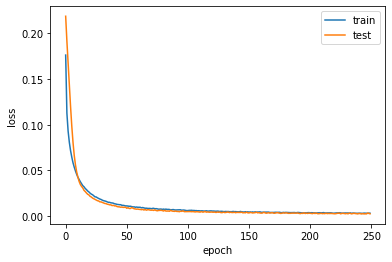

In [25]:
plt.plot(training.history['loss'], label='train');
plt.plot(training.history['val_loss'], label='test');
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend();

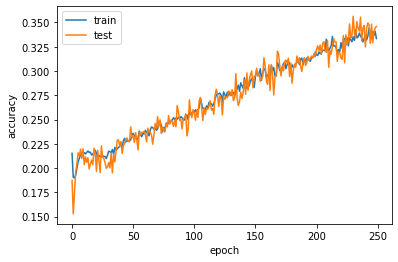

In [26]:
plt.plot(training.history['accuracy'], label='train');
plt.plot(training.history['val_accuracy'], label='test');
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend();